In [25]:
import uncertainties 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.optimize import curve_fit
from statistics import stdev
from scipy import odr
from scipy.odr import RealData
print(Path.cwd().absolute())

C:\Users\lukso\Dropbox\Praktika I


In [13]:
praktikum = "Tex_tables\XXIV.tex"

# dictionary = {"t [$\degree$C]":[21.0,26.0,31.0,36.0,41.0,46.0,51.0,56.0,61.0],
#               "l_o [mm]":[0.000,0.035,0.070,0.105,0.140,0.170,0.200,0.240,0.270],
#               #"t_m":[21.0,26.0,31.0,36.0,41.0,46.0,51.0,56.0,61.0],
#               "l_m [mm]":[0.000,0.060,0.110,0.160,0.215,0.270,0.320,0.370,0.430],
#               #"t_h":[21.0,26.0,31.0,36.0,41.0,46.0,51.0,56.0,61.0],
#               "l_h [mm]":[0.000,0.065,0.115,0.180,0.245,0.305,0.370,0.435,0.485],
#               #"t_s":[21.0,26.0,31.0,36.0,41.0,46.0,51.0,56.0,61.0],
#               "l_s [mm]":[0.000,0.010,0.020,0.025,0.030,0.040,0.050,0.055,0.060]
# }
temperature = [18,23,28,33,38,43,48,53,58,63,68]
values_1 = [0,0.075,0.110,0.160,0.220,0.280,0.335,0.390,0.450,0.500,float("Nan")]
values_2 = [0,0.060,0.130,0.190,0.265,0.330,0.400,0.460,0.530,0.595,float("Nan")]
values_3 = [0,0.050,0.100,0.155,0.200,0.250,0.305,0.360,0.410,0.460,float("Nan")]
values_4 = [0,0.030,0.060,0.095,0.130,0.165,0.200,0.235,0.260,0.300,float("Nan")]

error_of_means = np.array([0.005 for x in values_1[:10]])
error_of_temp = np.array([0.5 for x in values_1[:10]])

print(error_of_means)

values_5 = [0,float("Nan"),0.020,float("Nan"),0.040,float("Nan"),0.050,float("Nan"),0.070,float("Nan"),0.080]
dictionary = {"t [$\degree$C]":temperature,
              "l_1 [mm]":values_1,
              "l_2 [mm]":values_2,
              "l_3 [mm]":values_3,
              "l_4 [mm]":values_4,
              "l_5 [mm]":values_5
              
             }

dframe = pd.DataFrame(dictionary)

with open(praktikum,"w") as f:
    f.write(dframe.to_latex(index_names=False, index=False,na_rep="-"))
    

[0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005]


C:\Users\lukso\AppData\Local\Temp\ipykernel_2544\2592131921.py:35: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(dframe.to_latex(index_names=False, index=False,na_rep="-"))


# Výpočet nejistoty - knihovna uncertainties

In [3]:
print(np.shape(error_of_means[::2]),np.shape(dframe["t [$\degree$C]"][::2]),np.shape(dframe["l_1 [mm]"].dropna()))

(5,) (6,) (10,)


In [49]:
def linear_fit(t,k,C):
    return(k*t +C)

def linear_fit_odr(B,t):
    return(B[0]*t +B[1])

def quadratic_fit(x,a,b,c):
    return(a* x**2 + b*x +c)

# def linear_fit(t,k):
#     return(k*t)

coeff_1,err_1 = curve_fit(linear_fit,dframe["t [$\degree$C]"][:10],dframe["l_1 [mm]"].dropna(),sigma=error_of_means,absolute_sigma=True)
coeff_2,err_2 = curve_fit(linear_fit,dframe["t [$\degree$C]"][:10],dframe["l_2 [mm]"].dropna(),sigma=error_of_means,absolute_sigma=True)
coeff_3,err_3 = curve_fit(linear_fit,dframe["t [$\degree$C]"][:10],dframe["l_3 [mm]"].dropna(),sigma=error_of_means,absolute_sigma=True)
coeff_4,err_4 = curve_fit(linear_fit,dframe["t [$\degree$C]"][:10],dframe["l_4 [mm]"].dropna(),sigma=error_of_means,absolute_sigma=True)
coeff_5,err_5 = curve_fit(linear_fit,dframe["t [$\degree$C]"][::2],dframe["l_5 [mm]"].dropna(),sigma=error_of_means[:6],absolute_sigma=True)
l_0 = 0.6

coeff_list = np.array([coeff_1[0],coeff_2[0],coeff_3[0],coeff_4[0],coeff_5[0]])

error_list = np.sqrt(np.array([err_1[0][0],err_2[0][0],err_3[0][0],err_4[0][0],err_5[0][0]]))


alpha_1 = round(coeff_1[0]/l_0 *1000,1)
alpha_2 = round(coeff_2[0]/l_0 *1000,1)
alpha_3 = round(coeff_3[0]/l_0 *1000,1)
alpha_4 = round(coeff_4[0]/l_0 *1000,1)
alpha_5 = round(coeff_5[0]/l_0 *1000,1)

alpha_list= np.array([alpha_1,alpha_2,alpha_3,alpha_4,alpha_5])

table_info = {"Material":["Mosaz", "Hlinik","Med","Ocel","Sklo"], 
                          "\alpha [\degree C^{-1} 1e-6]":np.round(alpha_list,2),
                          "\eta_\alpha":np.round(((error_list*1e3)/alpha_list),2)
                          }

table_error = {"Material":["Mosaz", "Hlinik","Med","Ocel","Sklo"], 
                          "Koeficient C [m^{-1}°C^{-1} 1e-6]":np.round(coeff_list*1e3,2),
                          "Chyba koeficientu [m^{-1}°C^{-1} 1e-6]":np.round(error_list*1e3,2)
                          }

table = pd.DataFrame(table_info)

coeff_table = pd.DataFrame(table_error)

print(alpha_1,alpha_2,alpha_3,alpha_4,alpha_5)

with open("Tex_tables\XXIVres.tex","w") as f:
    f.write(table.to_latex(index_names=False, index=False))

with open("Tex_tables\XXIVcoeff.tex","w") as f:
    f.write(coeff_table.to_latex(index_names=False, index=False))

error_list

18.4 22.2 17.1 11.2 2.7


C:\Users\lukso\AppData\Local\Temp\ipykernel_2544\2906218640.py:49: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(table.to_latex(index_names=False, index=False))
C:\Users\lukso\AppData\Local\Temp\ipykernel_2544\2906218640.py:52: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(coeff_table.to_latex(index_names=False, index=False))


array([0.0001101 , 0.0001101 , 0.0001101 , 0.0001101 , 0.00011952])

In [51]:
datatest = RealData(dframe["t [$\degree$C]"][:6],dframe["l_5 [mm]"].dropna(),sx=error_of_temp,sy=error_of_means)
quad_model = odr.Model(linear_fit_odr)
print(np.shape(dframe["l_5 [mm]"].dropna()))
odrtest = odr.ODR(datatest,quad_model,beta0=[1,2])
out = odrtest.run()
error_list = np.array([0.00015939,7.377*1e-5,5.84*1e-5,6.76*1e-5,0.000174])

(6,)


In [32]:
print(error_list*1e3)
print(alpha_list)
(error_list*1e3)/alpha_list

[0.11009638 0.11009638 0.11009638 0.11009638 0.11952286]
[18.4 22.2 17.1 11.2  2.7]


array([0.0059835 , 0.0049593 , 0.00643838, 0.00983003, 0.04426773])

In [6]:
print(error_list)

[0.0001101  0.0001101  0.0001101  0.0001101  0.00011952]


In [47]:
from uncertainties import ufloat
from uncertainties.umath import *
# Vzorec, pro který chceme vypočítat chybu
#
# def error_generator(inputset):
#     deviation = stdev(inputset)

l0 = ufloat(600,1) #mm
K = ufloat(coeff_list[0],error_list[0]*1e3)

final_error = np.empty(5,dtype=type(K))
for i in range(len(coeff_list)):
    print(i)
    
    K = ufloat(coeff_list[i],error_list[i]*1e3)
    final_error[i] = K/l0
    
print(final_error)
prelast = [[1.8404040400445595e-02,0.00026565000177085926],
 [2.220202020173944e-02,0.00012295000556831697],
 [1.709090908731133e-02,9.733333750141508e-05],
 [1.118181818125793e-02,0.00011266666820800121],
 [2.666666665603614e-03,0.00029000000003405707]]

#print(prelast*1e3)
percent = [1e2* x[1]/x[0] for x in prelast]
percent

0
1
2
3
4
[1.8404040400445595e-05+/-0.00026565000177085926
 2.220202020173944e-05+/-0.00012295000556831697
 1.709090908731133e-05+/-9.733333750141508e-05
 1.118181818125793e-05+/-0.00011266666820800121
 2.666666665603614e-06+/-0.00029000000003405707]


C:\Users\lukso\AppData\Local\Temp\ipykernel_2544\2964780645.py:11: DeprecationWarning: in the future the `.dtype` attribute of a given datatype object must be a valid dtype instance. `data_type.dtype` may need to be coerced using `np.dtype(data_type.dtype)`. (Deprecated NumPy 1.20)
  final_error = np.empty(5,dtype=type(K))


[1.4434330505187731,
 0.5537784600280848,
 0.5695035706068878,
 1.0075880897155356,
 10.875000005612401]

In [8]:
# x_axis = dframe["t [$\degree$C]"]
# plt.scatter(x_axis,dframe["l_o [mm]"],label="Ocel",marker="^")
# plt.scatter(x_axis,dframe["l_h [mm]"],label ="Hliník",marker="*")
# plt.scatter(x_axis,dframe["l_m [mm]"],label="Mosaz",marker=".")
# plt.scatter(x_axis,dframe["l_s [mm]"],label="Sklo",marker="+")

# plt.plot(x_axis,linear_fit(x_axis,*coeff_o),label="Ocel_fit",linestyle="dashed",lw = 0.5)
# plt.plot(x_axis,linear_fit(x_axis,*coeff_s),label="Sklo_fit",linestyle= "dashed",lw = 0.5)
# plt.plot(x_axis,linear_fit(x_axis,*coeff_m),label="Mosaz_fit",linestyle= "dashed",lw = 0.5)
# plt.plot(x_axis,linear_fit(x_axis,*coeff_h),label="Hliník_fit",linestyle="dashed",lw = 0.5)

# plt.xlabel("Δt [°C]")
# plt.ylabel(f"Prodloužení Δl [mm]")
# plt.title("Graf závislosti prodloužení na teplotě")
# plt.legend()
# plt.savefig("Graphs\\"+ str(praktikum.split("\\")[1][:4]))

# # Errorbar template
# #plt.errorbar(x_data, y_data, yerr_data, ls='', capsize=4, marker='.', ms=5, mec='black')


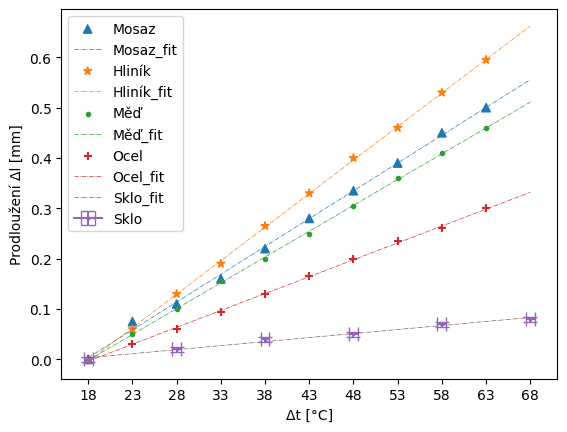

In [9]:
x_axis = dframe["t [$\degree$C]"]
plt.scatter(x_axis,dframe["l_1 [mm]"],label="Mosaz",marker="^",ls="")
plt.plot(x_axis,linear_fit(x_axis,*coeff_1),label="Mosaz_fit",linestyle="-.",lw = 0.5)
plt.scatter(x_axis,dframe["l_2 [mm]"], label ="Hliník",marker="*",ls="")
plt.plot(x_axis,linear_fit(x_axis,*coeff_2),label="Hliník_fit",linestyle= "-.",lw = 0.5)
plt.scatter(x_axis,dframe["l_3 [mm]"],label="Měď",marker=".")
plt.plot(x_axis,linear_fit(x_axis,*coeff_3),label="Měď_fit",linestyle= "-.",lw = 0.5)
plt.scatter(x_axis,dframe["l_4 [mm]"],label="Ocel",marker="+")
plt.plot(x_axis,linear_fit(x_axis,*coeff_4),label="Ocel_fit",linestyle="-.",lw = 0.5)

plt.errorbar(x_axis,dframe["l_5 [mm]"],yerr=0.005,xerr=0.5,label="Sklo",marker="x",ms=2,capsize=5)

plt.plot(x_axis,linear_fit(x_axis,*coeff_5),label="Sklo_fit",linestyle="-.",lw = 0.5)





plt.xlabel("Δt [°C]")
plt.ylabel(f"Prodloužení Δl [mm]")
plt.xticks(x_axis)
# plt.title("Graf závislosti prodloužení na teplotě")
plt.legend()
plt.savefig("Graphs\\"+ str(praktikum.split("\\")[1][:4]))

# Errorbar template
# plt.errorbar(x_axis, dframe["l_1 [mm]"],0.005,xerr=0.5, ls='', capsize=4, marker='^', ms=5, mec='black')
